In [16]:
## Image Compression using SVD method
## Any large-scale matrix X of size (nxm, usually with n>>m) can be decomposed in the form of X = U*Sig*V^(T)
## The dimensions are namely : (nxn) and (nxm) and (mxm)
## U and V are unitary matrices (U^{T}*U = U*U^{T} = I) containing column vectors u1, u2, ...., un and v1, v2, ..., vm
## Sig is a "quasi-" diagonal matrix at most m number of non-zero entries on the diagonal line, each of which is called a singular value and are organized in an hierarchy order
## u_i and v_i (i<=m) are the corresponding modes of sig_i
## Economy form : only using the first m columns in U
## Theorem: SVD has proven to be the optimal rank-r approximation to matrix X, in the Forbenius norm sense 
## Rank-r approximation uses r independent column vectors in U and r independent row vectors in V^{T} in the decomposition, recall that column vectors in U,V are linearly independent and orthogonal to each other
## the magnitude of sigma decreases dramatically with hierarchy order, and therefore good approximation can be achieved when only a few ranks are remained, and thus compressing the image of high-dimensionality
## will demonstrate in the following image compression examples how increasing r improve the approximation

import cv2
import matplotlib.pyplot as plt
import numpy as np

(961, 568)


(-0.5, 567.5, 960.5, -0.5)

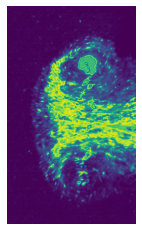

In [17]:
# first, load an image using cv2 and convert it to greyscale

img = cv2.imread('snapshot.tif',cv2.IMREAD_GRAYSCALE) 
print(img.shape) # display the original image has a dimensionality of 961x568
plt.imshow(img)
plt.axis('off')

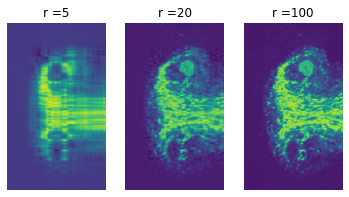

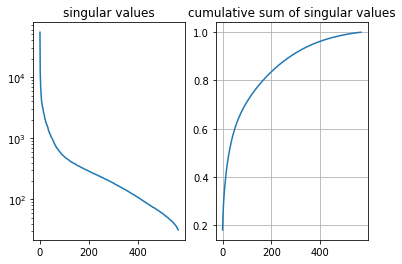

In [18]:
# Now compute the SVD of the input image (matrix X)
X = img
U, S, VT = np.linalg.svd(X, full_matrices = False) # here use the economy form that only retains first m columns in U and S is strictly diagonal
S = np.diag(S)

rank = [5,20,100]
err_frob = []
err_norm2 = []
i = 0 # just an index for counting

fig, axs=plt.subplots(1,len(rank))
# different rank-r approximations to be tested
for r in rank:
    U_approx = U[:,:r]
    S_approx = S[:r,:r]
    VT_approx = VT[:r,:]
    X_approx = U_approx @ S_approx @ VT_approx

    err_frob_r = np.linalg.norm((X_approx - X), ord = 'fro')
    err_frob.append(err_frob_r)
    err_norm2_r = np.linalg.norm((X_approx - X), ord = 2)
    err_norm2.append(err_norm2_r)
   
    axs[i].imshow(X_approx)
    axs[i].set_title('r =' + str(r))
    axs[i].axis('off')
    i += 1
 

## Now we can compare the theoretically computed error and the actual error
err_expct_f = [np.sqrt(np.sum([np.diag(S[r:,r:])**2])) for r in rank]
## ** The Forbenius error is related to the loss of Kinetic Energy if X are flow velocity fields
err_expct_n2 = [np.diag(S)[r] for r in rank]

## Plot singular values and verify that they decrease drastically with the hierarchy order
## The first few singular values are dominant and the truncation may give good approx. to X
fig,axs = plt.subplots(1,2)
axs[0].plot(np.diag(S))
axs[0].set_yscale('log')
axs[0].set_title('singular values')
axs[1].plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))))
axs[1].set_title('cumulative sum of singular values')
plt.grid(fig)

Text(0.5, 1.0, 'corr matrix of columns')

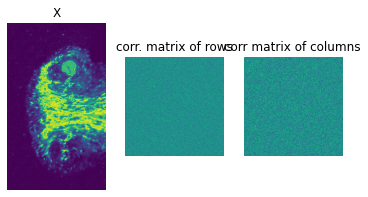

In [21]:
## SVD interpretation as Dominant Correlations
## The correlation matrix XXT (inner produc of rows of X) has non-zero eigenvalues of sig^2 
## and eigenvectors of columns in U 
## The correlation matrix XTX (inner produc of columnss of X) has non-zero eigenvalues of sig^2 
## and eigenvectors of columns in V
## Thus, the columns of U are hierarchically ordered by how much correlation they capture in the (rows?) of X
## and, the columns of V are hierarchically ordered by how much correlation they capture in the (columns?) of X

X_H = X.conj().T
corrXRow = X @ X_H
corrXCol = X_H @ X
fig, axs=plt.subplots(1,3)
axs[0].imshow(X); axs[0].axis('off'); axs[0].set_title('X')
axs[1].imshow(corrXRow); axs[1].axis('off'); axs[1].set_title('corr. matrix of rows')
axs[2].imshow(corrXCol); axs[2].axis('off'); axs[2].set_title('corr matrix of columns')